### Import Necessary Modules

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.models import load_model
%matplotlib inline

### Load Dataset And Preprocess

In [27]:
IMG_SIZE =(224,224)
BATCH_SIZE = 32
EPOCHS=10
OUTPUT_SHAPE=5


dataset = tf.keras.preprocessing.image_dataset_from_directory('C:\\Users\\thesu\Desktop\\sample_project_1\\crop_images',
                                                             shuffle=True,
                                                             batch_size=BATCH_SIZE,
                                                             image_size=(IMG_SIZE))

Found 854 files belonging to 5 classes.


### Split Train-Test-Val

In [28]:
def create_data_batch(dataset,train_size=0.8,test_size=0.1,val_size=0.1,shuffle=True,shuffle_size=1000):
    data_size = len(dataset)
    
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=6)
        
    train_size = int(data_size*train_size)
    val_size = int(data_size*test_size)
    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    
    return train_ds,test_ds,val_ds

In [29]:
train_ds,test_ds,val_ds = create_data_batch(dataset)

In [30]:
len(train_ds),len(test_ds),len(val_ds)

(21, 4, 2)

In [158]:
class_name = dataset.class_names
class_name

['jute', 'maize', 'rice', 'sugarcane', 'wheat']

### Images in Train Dataset

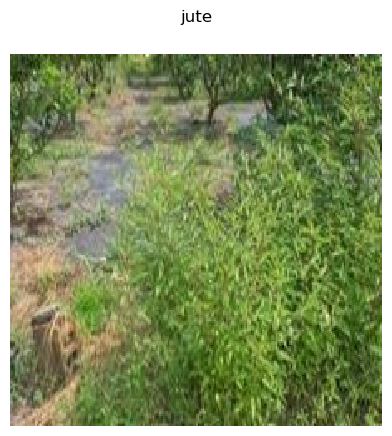

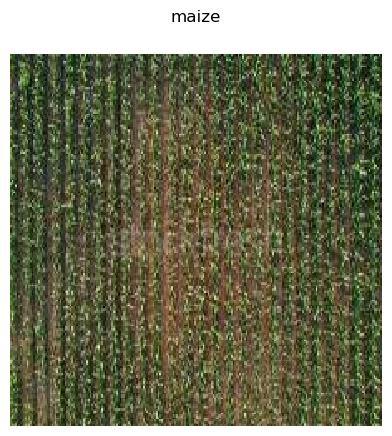

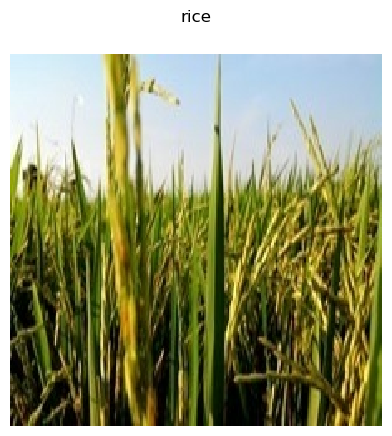

In [161]:
for image,label in train_ds.take(1):
    for i in range(3):
        
        plt.matshow(image[i].numpy().astype('uint8'))
        plt.title(class_name[label[i]])
        plt.axis('off')

### Model Building Using CNN

In [33]:
rescale_resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255),
    tf.keras.layers.experimental.preprocessing.Resizing(224,224)
])

In [82]:
INPUT_SHAPE=(BATCH_SIZE,224,224,3)

model = tf.keras.Sequential([
    #CNN
    rescale_resize,
    tf.keras.layers.Conv2D(80,kernel_size=(3,3),activation="relu",input_shape=INPUT_SHAPE),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(48,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),

    #DENSE LAYER
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(OUTPUT_SHAPE,activation="softmax")

])

model.build(INPUT_SHAPE)

In [83]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (32, 222, 222, 80)        2240      
                                                                 
 max_pooling2d_15 (MaxPooli  (32, 111, 111, 80)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (32, 109, 109, 64)        46144     
                                                                 
 max_pooling2d_16 (MaxPooli  (32, 54, 54, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (32, 52, 52, 48)         

In [84]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

callback=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=2)

In [85]:
history = model.fit(train_ds,epochs=20,validation_data=val_ds,batch_size=BATCH_SIZE,callbacks=[callback])

Epoch 1/20
21/21 [==============================] - 45s 2s/step - loss: 1.6862 - accuracy: 0.2961 - val_loss: 1.4777 - val_accuracy: 0.2969
Epoch 2/20
21/21 [==============================] - 43s 2s/step - loss: 1.3637 - accuracy: 0.4562 - val_loss: 0.9706 - val_accuracy: 0.6406
Epoch 3/20
21/21 [==============================] - 44s 2s/step - loss: 1.2480 - accuracy: 0.4747 - val_loss: 1.3209 - val_accuracy: 0.3906
Epoch 4/20
21/21 [==============================] - 43s 2s/step - loss: 1.0513 - accuracy: 0.5937 - val_loss: 1.1922 - val_accuracy: 0.5000
Epoch 5/20
21/21 [==============================] - 43s 2s/step - loss: 0.9510 - accuracy: 0.6480 - val_loss: 0.7558 - val_accuracy: 0.7500
Epoch 6/20
21/21 [==============================] - 44s 2s/step - loss: 0.7222 - accuracy: 0.7381 - val_loss: 0.4761 - val_accuracy: 0.8594
Epoch 7/20
21/21 [==============================] - 44s 2s/step - loss: 0.5371 - accuracy: 0.8157 - val_loss: 0.3524 - val_accuracy: 0.9219
Epoch 8/20
21/21 [==

In [86]:
model.evaluate(test_ds)

4/4 [==============================] - 2s 331ms/step - loss: 0.0328 - accuracy: 0.9922


[0.03275617957115173, 0.9921875]

### Medel Performance LOSS AND ACC IN VALIDATION-TRAINING

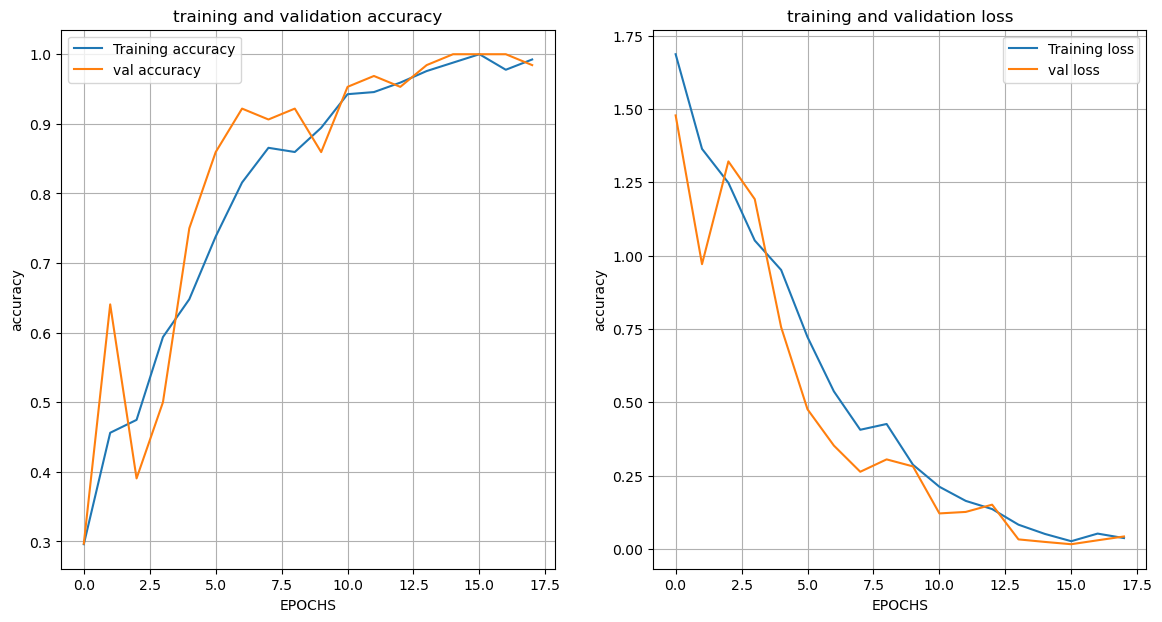

In [149]:
acc = history.history["accuracy"]
loss = history.history['loss']
val_acc = history.history["val_accuracy"]
val_loss = history.history['val_loss']

len(acc),len(loss),len(val_acc),len(val_loss)


# Accuracy for training and val
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.plot(range(18),acc,label="Training accuracy")
plt.plot(range(18),val_acc,label="val accuracy")
plt.legend()
plt.title("training and validation accuracy")
plt.xlabel('EPOCHS')
plt.ylabel('accuracy')
plt.grid()
 # loss for val and training
plt.subplot(1,2,2)
plt.plot(range(18),loss,label="Training loss")
plt.plot(range(18),val_loss,label="val loss")
plt.legend()
plt.title("training and validation loss")
plt.xlabel('EPOCHS')
plt.ylabel('accuracy')
plt.grid();

### Define A Function To predict

In [6]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

### Predicting 9 Test Images

1/1 [==============================] - 0s 63ms/step


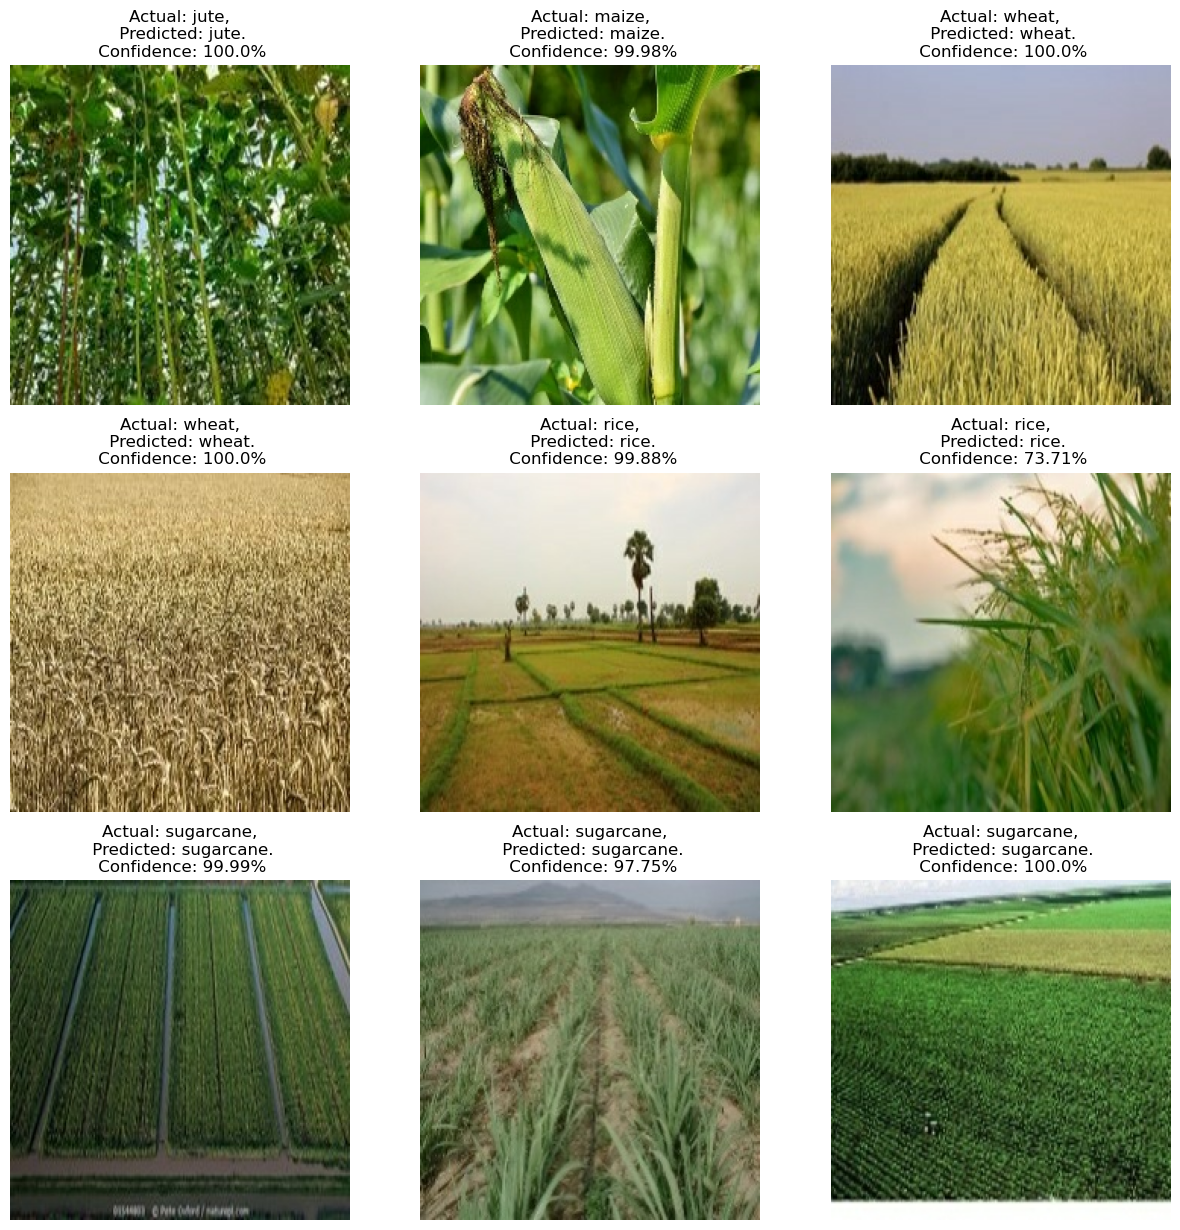

In [152]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [16]:
def predict_single_img(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [14]:
class_name = ['jute', 'maize', 'rice', 'sugarcane', 'wheat']

## Save And Load Our Model And Predict

In [87]:
model.save("crop prediction modelV2.keras")

In [3]:
model2=load_model("crop prediction modelV2.keras")

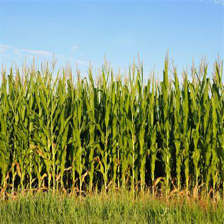

In [19]:
img = Image.open("maize.jpg").resize((224,224))
img

In [21]:
prediction,confidence = predict_single_img(model2,img)

print(prediction)
print(confidence)

1/1 [==============================] - 0s 64ms/step
maize
89.37
